# Assignment 2 - A

In [ ]:
%pip install numpy pandas matplotlib seaborn

## Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset and Preprocessing

In [ ]:
df = pd.read_csv('audi.csv')
print(df.shape)
df.head()

In [ ]:
df = df.drop(['year'], axis=1)

### No NAN values

In [ ]:
print(df.isna().sum())
df = df.dropna()

### Convert Strings to Categorical

In [ ]:
df.head()

In [ ]:
df['model'].unique()

In [ ]:
df['transmission'].unique()

In [ ]:
df['fuelType'].unique()

In [ ]:
def map_columns(column):
    unique_values = df[column].unique()
    mapping = {value: index + 1 for index, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)
    print(f"Mapping for {column}: {mapping}")

columns_to_map = ['model', 'transmission', 'fuelType']
for column in columns_to_map:
    map_columns(column)

In [ ]:
df.head()

## Center data

In [ ]:
# for col in df.columns:
#     if col not in ['model', 'transmission', 'fuelType']:
#         df[col] = (df[col] - df[col].mean())
# df.head()

### Normalize?

In [ ]:
for col in df.columns:
    if col not in ['model', 'transmission', 'fuelType', 'price']:
        df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

### Compute Covariance Matrix

In [ ]:
covMatrix = df.cov()
covMatrix

### Compute Correlation Matrix

In [ ]:
corrMatrix = df.corr()
corrMatrix

### Visualize Matrices

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(covMatrix, annot=True, cmap='coolwarm', fmt='.1f', xticklabels=df.columns, yticklabels=df.columns, annot_kws={"size": 10})
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt='.4f', xticklabels=df.columns, yticklabels=df.columns)
plt.title('Correlation Matrix')
plt.show()

### Eigenvector Eigenvalue Equation

In [ ]:
prices = df['price']

In [ ]:
df = df.drop(['price'], axis=1)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(df.cov())
eigenvalues, eigenvectors

### Solving for Principal Components

In [ ]:
k = 3

In [ ]:
eigenvalueIndices = np.argsort(eigenvalues)[::-1]
eigenvaluesSorted = eigenvalues[eigenvalueIndices]
eigenvectorsSorted = eigenvectors[:, eigenvalueIndices]
selectedEigenvectors = eigenvectorsSorted[:k]
selectedEigenvalues = eigenvaluesSorted[:k]
print(eigenvaluesSorted)
eigenvectorsSorted

In [ ]:
print(selectedEigenvalues)
selectedEigenvectors

### Sequential Variance Increase

In [ ]:
variance = []
for i in selectedEigenvalues:
    variance.append((i/sum(eigenvaluesSorted))*100)
variance

#### Taking the rest of the variances

In [ ]:
variance = []
for i in eigenvaluesSorted:
    if i not in selectedEigenvalues:
        variance.append((i/sum(eigenvaluesSorted))*100)
variance

## Visualization using Pair Plots

In [ ]:
g = pd.plotting.scatter_matrix(df, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 100}, s = 10, alpha = 0.5)

plt.show()

### Projecting Principal Components onto pair plots and visualizing as vectors

In [ ]:
selectedEigenvectors

In [ ]:
target = prices

In [ ]:
# Create scatter plots for each pair of features on new lines
fig, axes = plt.subplots(nrows=df.shape[1]**2, ncols=1, figsize=(10, 10 * df.shape[1]**2))

for i in range(df.shape[1]):
    for j in range(df.shape[1]):
        ax = axes[i * df.shape[1] + j]
        
        # Scatter plot with color grading based on target values
        scatter = ax.scatter(df.iloc[:, i], df.iloc[:, j], c=target, cmap='viridis', marker='o', alpha=0.5, s=30, edgecolor='black', linewidth=0.5, label='Data Points')
        ax.set_xlabel(df.columns[i], fontsize=12)
        ax.set_ylabel(df.columns[j], fontsize=12)
        ax.set_title(f"{df.columns[i]} vs {df.columns[j]}", fontsize=14)
        ax.tick_params(axis='both', which='both', labelsize=10)
        ax.grid(True, linestyle='--', alpha=0.3)

        # Plot selectedEigenvectors with scaling
        colors = ['red', 'green', 'blue']
        cnt = 0
        for egnvctr in selectedEigenvectors:
            # Calculate center dynamically
            center_x = df.iloc[:, i].mean()
            center_y = df.iloc[:, j].mean()
            
            ax.axline((center_x, center_y), (center_x + egnvctr[i] * 20, center_y + egnvctr[j] * 20), color=colors[cnt])
            cnt += 1

# Add improved colorbar
cbar = plt.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.1, label='Target', ticks=np.linspace(target.min(), target.max(), 5))

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
# Create scatter plots for each pair of features on new lines
fig, axes = plt.subplots(nrows=df.shape[1]**2, ncols=1, figsize=(10, 10 * df.shape[1]**2))

for i in range(df.shape[1]):
    for j in range(df.shape[1]):
        ax = axes[i * df.shape[1] + j]
        
        # Scatter plot with color grading based on target values
        scatter = ax.scatter(df.iloc[:, i], df.iloc[:, j], c=target, cmap='viridis', marker='o', alpha=0.5, s=30, edgecolor='black', linewidth=0.5, label='Data Points')
        ax.set_xlabel(df.columns[i], fontsize=12)
        ax.set_ylabel(df.columns[j], fontsize=12)
        ax.set_title(f"{df.columns[i]} vs {df.columns[j]}", fontsize=14)
        ax.tick_params(axis='both', which='both', labelsize=10)
        ax.grid(True, linestyle='--', alpha=0.3)

        # Plot selectedEigenvectors with arrows
        colors = ['red', 'green', 'blue']
        cnt = 0
        for egnvctr in selectedEigenvectors:
            # Calculate center dynamically
            center_x = df.iloc[:, i].mean()
            center_y = df.iloc[:, j].mean()
            
            # Calculate arrow length based on eigenvector magnitude
            arrow_length = np.linalg.norm(egnvctr) * 20
            
            # Use arrow instead of line
            ax.arrow(center_x, center_y, egnvctr[i] * arrow_length/(np.sqrt(egnvctr[j]*egnvctr[j]+egnvctr[i]*egnvctr[i])), egnvctr[j] * arrow_length/(np.sqrt(egnvctr[j]*egnvctr[j]+egnvctr[i]*egnvctr[i])), head_width=0.5, head_length=0.5, fc=colors[cnt], ec=colors[cnt])
            cnt += 1

# Add improved colorbar
cbar = plt.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.1, label='Target', ticks=np.linspace(target.min(), target.max(), 5))

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Visualizing Byplots

#### Project the Data

In [ ]:
pcaDf = df.dot(selectedEigenvectors.T)
pcaDf.columns = ["PC " + str(x) for x in range(pcaDf.shape[1])]
pcaDf.shape, df.shape

#### Visualize Byplots of these principal components with loadings

In [ ]:
loadings = selectedEigenvectors
for i in range(loadings.shape[0]):
    loadings[i] = loadings[i]*np.sqrt(selectedEigenvalues[i])
print(loadings.shape)

/tmp/ipykernel_8037/3612362027.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout for better spacing


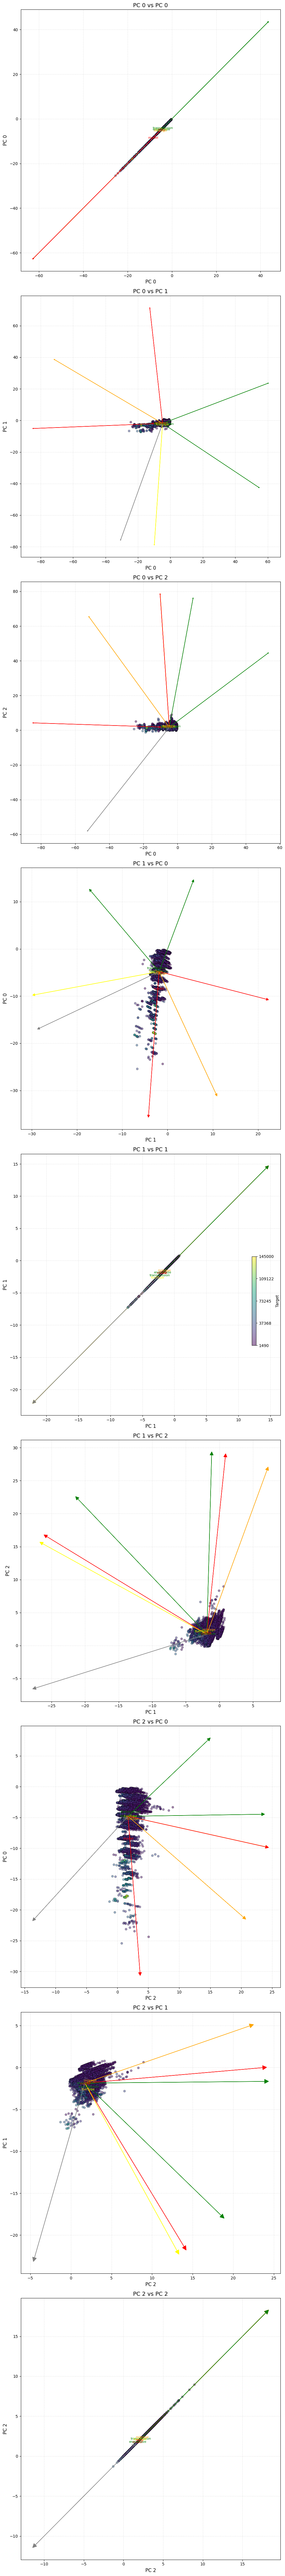

In [135]:
# Create scatter plots for each pair of features on new lines
fig, axes = plt.subplots(nrows=pcaDf.shape[1]**2, ncols=1, figsize=(10, 10 * pcaDf.shape[1]**2))

for i in range(pcaDf.shape[1]):
    for j in range(pcaDf.shape[1]):
        ax = axes[i * pcaDf.shape[1] + j]
        
        # Scatter plot with color grading based on target values
        scatter = ax.scatter(pcaDf.iloc[:, i], pcaDf.iloc[:, j], c=target, cmap='viridis', marker='o', alpha=0.5, s=30, edgecolor='black', linewidth=0.5, label='Data Points')
        ax.set_xlabel(pcaDf.columns[i], fontsize=12)
        ax.set_ylabel(pcaDf.columns[j], fontsize=12)
        ax.set_title(f"{pcaDf.columns[i]} vs {pcaDf.columns[j]}", fontsize=14)
        ax.tick_params(axis='both', which='both', labelsize=10)
        ax.grid(True, linestyle='--', alpha=0.3)

        # Plot loadings
        colors = ['red', 'green', 'orange', 'yellow', 'gray', 'red', 'green', 'orange', 'yellow', 'gray']
        cnt = 0
        # Calculate center dynamically
        center_x = pcaDf.iloc[:, i].mean()
        center_y = pcaDf.iloc[:, j].mean()
        for k in range(loadings.shape[1]):


            # Calculate arrow length based on eigenvector magnitude
            arrow_length = np.linalg.norm(loadings[i]) * 20
            mag = np.sqrt(loadings[i, k]**2 + loadings[j, k]**2)
                
            
            # ax.arrow(center_x, center_y, egnvctr[i] * arrow_length/(np.sqrt(egnvctr[j]*egnvctr[j]+egnvctr[i]*egnvctr[i])), egnvctr[j] * arrow_length/(np.sqrt(egnvctr[j]*egnvctr[j]+egnvctr[i]*egnvctr[i])), head_width=0.5, head_length=0.5, fc=colors[cnt], ec=colors[cnt])
            
            
            # Plot arrows for loadings
            ax.arrow(center_x, center_y, center_x+loadings[i, k]*arrow_length/mag, center_y+loadings[j, k]*arrow_length/mag, head_width=0.5, head_length=0.5, fc=colors[cnt], ec=colors[cnt])
            
            # Add labels near the arrows
            ax.text(center_x + loadings[i, k], center_y + loadings[j, k], f'{df.columns[k]}', color=colors[cnt], fontsize=8, ha='center', va='center')
            
            cnt += 1

# Add improved colorbar
cbar = plt.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.1, label='Target', ticks=np.linspace(target.min(), target.max(), 5))

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Testing on Linear Regression

In [ ]:
def fit_linear_regression(x, y, lr=0.00001, e=0.9):
    # Insert new column with ones (bias)
    regression = np.c_[x, np.ones(len(x))]
    # Weights with same width as x
    weights = np.ones(regression.shape[1])
    # Gradient Descent
    norma = 1
    while(norma > e):
        y_pred = regression @ weights
        partial = regression.T @ (y-y_pred)
        norma = np.sum(np.sqrt(np.square(partial)))

        weights = weights.T + (lr*partial)

        if np.isnan(norma):
            print('MODEL DIVERGED! USE LOWER LEARNING RATE!')
        
    return weights

def predict(w, x):
    return w[:-1] @ np.array(x).T + w[-1]

def MSE(y, y_pred):
    return np.sum(np.square(y - y_pred))/float(len(y))

def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [ ]:
import time

In [ ]:
start_time = time.time()

# Fit linear regression using gradient descent
weights = fit_linear_regression(df, target, lr=0.000001)

# Make predictions on the original data
y_pred = predict(weights, df)

# Calculate MSE
rmse = np.sqrt(MSE(target, y_pred))
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')
rmse

In [ ]:
start_time = time.time()
# Fit linear regression using gradient descent
weights = fit_linear_regression(pcaDf, target, lr=0.000001)

# Make predictions on the transformed data
y_pred = predict(weights, pcaDf)

# Calculate MSE
rmse = np.sqrt(MSE(target, y_pred))
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')
rmse

## Conclusion and Analysis

### Analysis

_Tasks we performed:_

1. Convert categorical columns to numerical using some mapping
2. Remove unecessary year column
3. Calculate Eigenvalues and Eigenvectors using Covariance Matrix
4. Solve for Principal Components
5. Find percentage of variance captured in each Principal Component
6. Visualize transformed data using biplots
7. Comparision Test of PCA and Regular data using Linear Regression

### Key Findings

1. Most of the variance (~91%) was covered using just 3 Principal Components. This reduced the number of components from 7 to 3...

2. In this process, we observed that while a simple Linear Regression model gave a worse MSE for the transformed data (8652.066398178978 vs 5817.958642318083), it took a much shorter time for the loss to reach the minimum (with the same learning rate)! It took only 4.167212724685669 for the model to fit the transformed features while it took almost 4 times more, 14.471240282058716, to fit the original features.